# Logistic Regression

This programming work is also related to Machine Learning by Stanford University at Coursera. In order to understand logistic regression deeper, I decided to realize it in Python.

In [9]:
import numpy as np
import scipy.io as sio 
import pylab as pl
%matplotlib inline

## Basic Logistic Regression

First, we need to define *sigmoid*, *cost* function. Note, *numpy* package can deal with *array*, and return *array*.

In [10]:
#Define sigmoid function
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

In [11]:
#Define cost function, X stands for input matrix
#y stands for the labels
def costFunc(X, y, theta):
    '''Calculate the errors of logistic regression'''
    if X is None or y is None:
        print 'Empty Input For Cost!'
        return None
    if len(X.shape) == 1 and len(theta) !=1 :
        print 'The dimensions do not match!'
        return None
    if len(X) != len(y) or X.shape[1] != len(theta):
        print 'The dimensions do not match!'
        return None
    m = len(y)#Length of y
    H = np.dot(X, theta)
    #print H
    Z = sigmoid(H)
    
    #Split the data into two parts, y=1, y=0
    y_1 = y[y==1]
    y_0 = y[y==0]    
    Z_1 = Z[y==1]
    Z_0 = Z[y==0]
    total = -np.dot(y_1, np.log(Z_1)) - np.dot(1-y_0, np.log(1-Z_0))
    if m>0:
        total = total/m
    else:
        print 'Zero data!'
        return None
    return total     

Note, if some of values in *H* are very large, Python may regard the sigmoid output as zeros or ones, which can not be handled by logistic function. We needd normalize the data initially.

Then, we create a function to do gradient descending algorithms. The key part is to update parameters during each iteration.

In [12]:
#Add oncstants to the original input
#Create theta with theta0
def addOnes(X):
    if X is None:
        print 'Input Null!'
        return None, None
    dim = X.shape
    #If X has multi variables
    if dim>1:
        feature_num = X.shape[1]
        X = np.insert(X, feature_num, 1, axis=1)
        theta = np.zeros(feature_num+1)
        return X, theta
    #If X only has one variable
    else:
        temp_X = np.ones([len(X), 2])
        temp_X[:, 0] = X
        theta = np.zeros(2)
        return temp_X, theta

In [13]:
#Update theta values
def trainLogisticRegression(X, y, alpha=0.01, num_iters=300):
    '''Update theta values'''
    #Deal with extreme cases
    if X is None or y is None:
        return None
    if len(X) != len(y):
        print 'The dimensions do not match!'
        return None 
    
    #Define some variables
    [X, theta] = addOnes(X)#Add ones to X
    #dim = X.shape
    sample_num = len(y)#the length of the samples
    feature_num = len(theta)#the number of features
    temp_theta = theta
    cost_iter = np.zeros(num_iters)#Record the cost each time
    
    #Iteration
    for i in range(num_iters):
        #Update theta during each iteration
        for j in range(feature_num):
            diff = sigmoid(np.dot(X, theta)) - y
            temp_theta[j] = theta[j] - alpha *  np.dot(diff, X[:, j])/sample_num
        theta = temp_theta
        #print theta
        cost_iter[i] = costFunc(X, y, theta)
    return theta, cost_iter

In order to check the performance of the algorithms, *predict* and *accuracy* functions are also needed. 

In [14]:
#Create a function to do predictions
def modelPredict(test, theta, threshold=0.5):
    '''Make predictions'''
    if len(test.shape) < 2:
        print 'The input has too few dimensions'
        return None
    feature_num = test.shape[1]
    sample_num = len(test)
    test = np.insert(test, feature_num, 1, axis=1)
    H = np.dot(test, theta)
    Z = sigmoid(H) 
    #print Z
    predictions = np.ones(sample_num)
    predictions[Z<threshold] = 0
    return predictions

In [15]:
#Calculate the accuracy
def accuracy(y, y_test):
    '''Calculate Accuracy'''
    return np.mean(y==y_test)

Load input files from the text, actually the data set was from materials of Machine Learning by Stanford University at Coursera.

In [16]:
file = open('ex2data1.txt')
data = []
for line in file:
    numbers = line.strip('\n').split(',')
    data.append(numbers)
data = np.float32(data)

In [17]:
data.shape

(100, 3)

We need to split data set into variables and outcome.

In [18]:
X = data[:, :2]
y = data[:, 2]

Have a look at the points in a 2D plot. Classes are distingushed by colors and shapes.

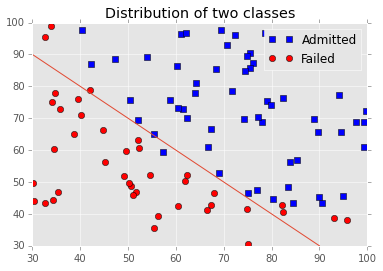

In [58]:
#sns.set(style="ticks", color_codes=True)
pos = X[y==1] #Data set belongs to Admitted
neg = X[y==0] #Data set belongs to Not Admitted
pl.style.use('ggplot')
point1 = pl.plot(pos[:, 0], pos[:, 1], 'bs', label='Admitted')
point2 = pl.plot(neg[:, 0], neg[:, 1], 'ro', label='Failed')
pl.plot([30, 90], [90, 30])
pl.title('Distribution of two classes')
pl.legend()

Now, let's do training work. In order to show the influence of the learning rate *alpha*, we pick several learning rates and compare the training performances.

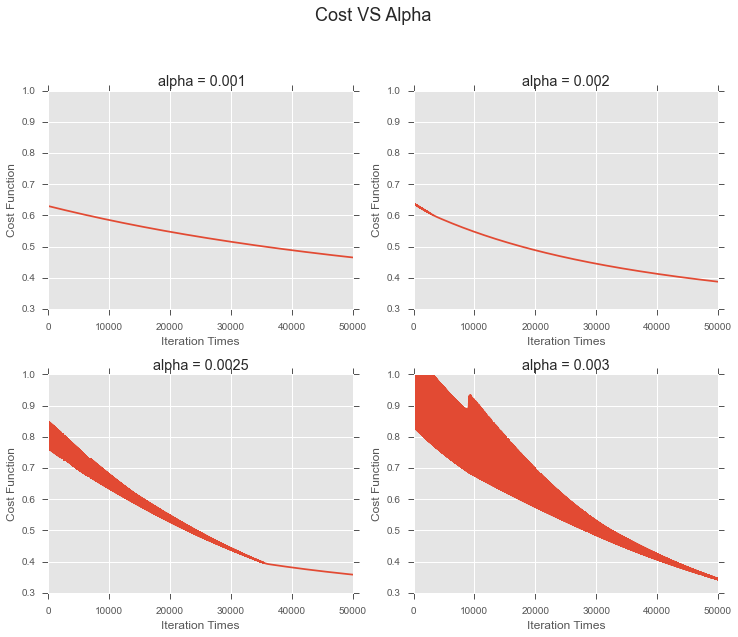

In [165]:
alphas = [0.001, 0.002, 0.0025, 0.003]
theta_list = []
cost_list = []
fig = pl.figure(figsize=(12,9))
for k, alpha in enumerate(alphas):
    [theta, costs] = trainLogisticRegression(X, y, alpha=alpha, num_iters=50000)
    theta_list.append(theta)
    cost_list.append(costs)
    ax = fig.add_subplot(2, 2, k+1)
    ax.plot(costs)
    #ax.set_title('Descending of Cost Function')
    ax.set_title('alpha = %s'%(alpha))
    ax.set_xlabel('Iteration Times')
    ax.set_ylabel('Cost Function') 
    ax.set_ylim([0.3, 1])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=0.3)
fig.suptitle('Cost VS Alpha', fontsize=18, y=1.03)

Generally speaking, the cost decays as iteration number increases. It seems if *alpha*=0.001, the cost converged very slow, whereas if *alpha*=0.003, it fluctuates a little bit sharply. And compare to 0.002, if *alpha*=0.0025, the cost will be lower after 50000 iterations. In our next parts, we only consider *alpha*=0.0025.

Let's analyse the result.

In [115]:
cost_list[2]

array([ 0.7793244 ,  0.79707963,  0.79911962, ...,  0.35829307,
        0.35829106,  0.35828904])

In [116]:
theta_list[2]

array([ 0.05244468,  0.04561333, -5.75504305])

In [166]:
y_hat = modelPredict(X, theta_list[2], threshold=0.5)
y_hat

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [167]:
y

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [168]:
accuracy(y, y_hat)

0.91000000000000003

The accuracy can be 91% for the training data set.

## Regularization

Regularization is commonly used in machine learning in order to prevent against overfitting. We need to modify our *cost* and *trainLogisticRegression* functions.

In [38]:
#Define cost function, X stands for input matrix
#y stands for the labels
#lambda1 stands for the regularization coefficient
def costFuncWithReg(X, y, theta, lambda1=0.01):
    '''Calculate the errors of logistic regression'''
    ###############Deal with unusual inputs###########
    if X is None or y is None:
        print 'Empty Input For Cost!'
        return None
    if len(X.shape) == 1 and len(theta) !=1 :
        print 'The dimensions do not match!'
        return None
    if len(X) != len(y) or X.shape[1] != len(theta):
        print 'The dimensions do not match!'
        return None
    ##############Calculate Output####################
    sample_num = len(y)#Length of y
    feature_num = len(theta)
    H = np.dot(X, theta)#Product of X and theta
    #print H
    Z = sigmoid(H)# Sigmoid Output
    #print Z
    ##############Calculate the Cost##################
    #Split the data into two parts, y=1, y=0
    y_1 = y[y==1]
    y_0 = y[y==0]    
    Z_1 = Z[y==1]
    Z_0 = Z[y==0]
    total = -np.dot(y_1, np.log(Z_1)) - np.dot(1-y_0, np.log(1-Z_0))
    if sample_num>0:
        total = total/sample_num
    else:
        print 'Invalid Input!'
        return None
    #############Add regularization###################
    #Note, theta0 is not considered
    total += lambda1 * sum(np.square(theta[:feature_num]))/2/sample_num
    return total     

In [39]:
#Update theta values
def trainLogisticRegressionWithReg(X, y, alpha=0.01, lambda1=0.01, num_iters=30):
    '''Update theta values'''
    #Deal with extreme cases
    if X is None or y is None:
        return None
    if len(X) != len(y):
        print 'The dimensions do not match!'
        return None 
    
    #Define some variables
    [X, theta] = addOnes(X)#Add ones to X
    #dim = X.shape
    sample_num = len(y)#the length of the samples
    feature_num = len(theta)#the number of features
    temp_theta = theta
    cost_iter = np.zeros(num_iters)#Record the cost each time
    
    #Iteration
    for i in range(num_iters):
        #Update theta during each iteration
        for j in range(feature_num):
            diff = sigmoid(np.dot(X, theta)) - y
            grad = np.dot(diff, X[:, j])/sample_num 
            #Skip theta0
            if j<feature_num - 1:
                grad += lambda1 * theta[j]/sample_num
            temp_theta[j] = theta[j] - alpha *  grad
        theta = temp_theta
        #print theta
        cost_iter[i] = costFuncWithReg(X, y, theta, lambda1)
    return theta, cost_iter

In [55]:
theta, costs = trainLogisticRegressionWithReg(X, y, alpha=0.0025, lambda1=0.001, num_iters=50000)

In [56]:
costs

array([ 0.77932441,  0.79707964,  0.79911964, ...,  0.35845871,
        0.35845669,  0.35845468])

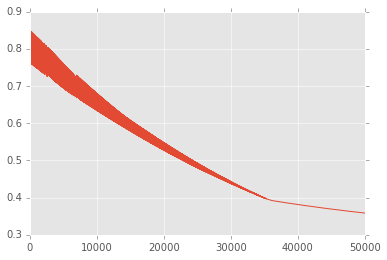

In [59]:
pl.plot(costs)

In [61]:
y_hat = modelPredict(X, theta, threshold=0.5)

In [62]:
accuracy(y, y_hat)

0.91000000000000003

## Stochastic Gradient Descending Method

For certain large data set, it is very expensive to loop over all the data set during the parameters update in terms of time and computation. For example, if there are 1 million samples, in traditional gradient descending method, each step, you have to calculate the sum of the differences between the output and real values, which are 1 million differences. In order to solve this problem, a new approach Stochastic Gradient Descending Method was introduced. Here, I will realize it as well.

In [ ]:
#Update theta values
def trainLogisticRegressionWithReg(X, y, alpha=0.01, lambda1=0.01, num_iters=30, option='SGD'):
    '''Update theta values'''
    #Deal with extreme cases
    if X is None or y is None:
        return None
    if len(X) != len(y):
        print 'The dimensions do not match!'
        return None 
    
    #Define some variables
    [X, theta] = addOnes(X)#Add ones to X
    #dim = X.shape
    sample_num = len(y)#the length of the samples
    feature_num = len(theta)#the number of features
    temp_theta = theta
    cost_iter = np.zeros(num_iters)#Record the cost each time
    
    #Iteration
    for i in range(num_iters):
        #Update theta during each iteration
        for j in range(feature_num):
            if option == 'GD':
                diff = sigmoid(np.dot(X, theta)) - y
                grad = np.dot(diff, X[:, j])/sample_num 
                #Skip theta0
                if j<feature_num - 1:
                    grad += lambda1 * theta[j]/sample_num
                temp_theta[j] = theta[j] - alpha *  grad
            if option == 'SGD':
                diff = sigmoid(np.dot(X, theta)) - y
                grad = np.dot(diff, X[:, j])/sample_num 
                #Skip theta0
                if j<feature_num - 1:
                    grad += lambda1 * theta[j]/sample_num
                temp_theta[j] = theta[j] - alpha *  grad
        theta = temp_theta
        #print theta
        cost_iter[i] = costFuncWithReg(X, y, theta, lambda1)
    return theta, cost_iter